## Кластеризация MNIST

Визуализация набора данных MNIST из [статьи](https://habr.com/ru/company/ods/blog/325654/)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1)

    figsize = (7, 4)
    if labels is not None:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2',
                                       c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                       alpha=0.5, figsize=figsize)
    else:
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')
    plt.show()

In [ ]:
from sklearn import datasets


digits = datasets.load_digits()
X = digits.data
y = digits.target

In [ ]:
X_test = X[-10:]
X = X[:-10]

y_test = y[-10:]
y = y[:-10]

X_test.shape, X.shape, y_test.shape, y.shape

((10, 64), (1787, 64), (10,), (1787,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
y[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
X.shape

(1787, 64)

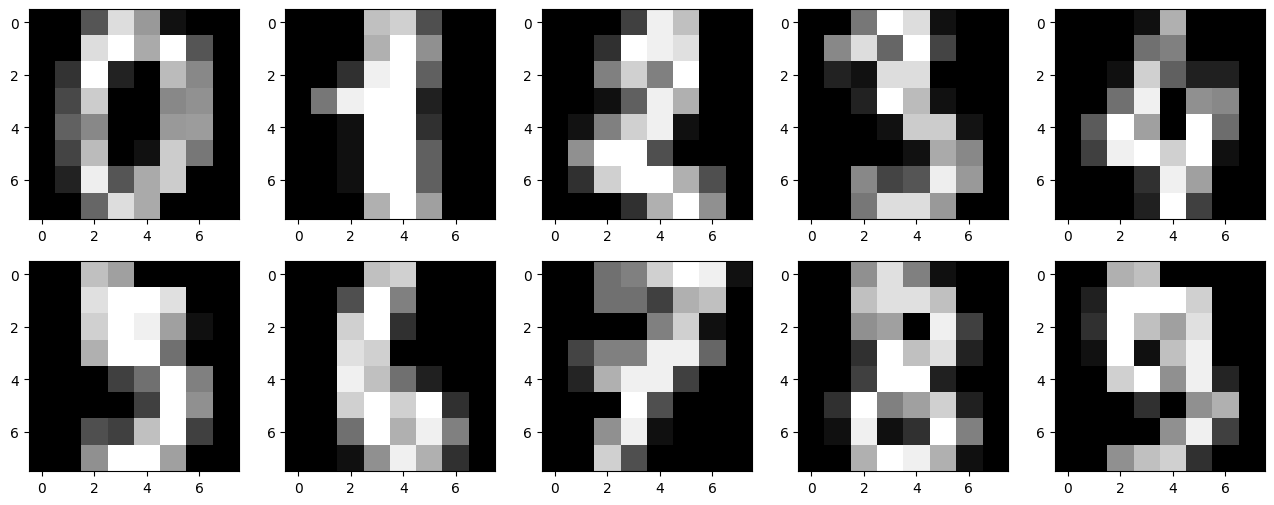

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')

**PCA**

In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(1787, 2)

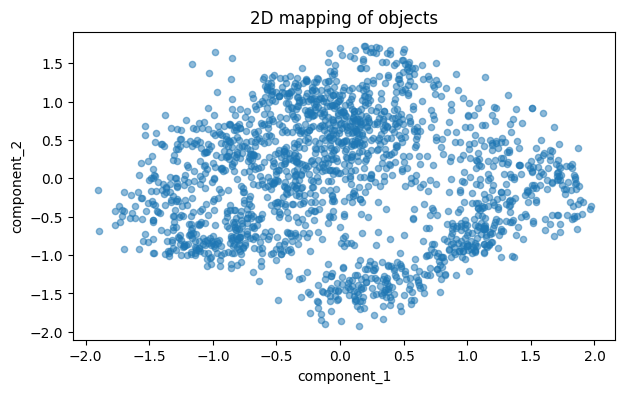

In [ ]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_reduced = pd.DataFrame(data=X_reduced, columns=colnames)
components_X_reduced.head()

display_components_in_2D_space(components_X_reduced)

**TSNE**

In [ ]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(random_state=17, perplexity=25)

X_tsne = tsne.fit_transform(X)

CPU times: user 18.2 s, sys: 108 ms, total: 18.3 s
Wall time: 25 s


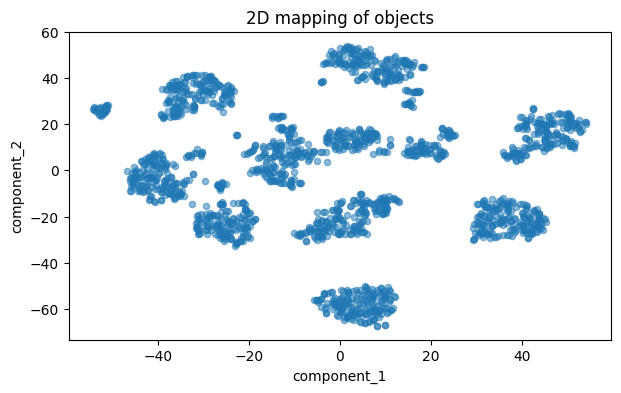

In [ ]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_tsne = pd.DataFrame(data=X_tsne, columns=colnames)
components_X_tsne.head()

display_components_in_2D_space(components_X_tsne)

### **KMeans**

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters')

In [ ]:
kmeans.predict(X_test)

array([5, 3, 1, 1, 3, 5, 4, 1, 5, 5], dtype=int32)

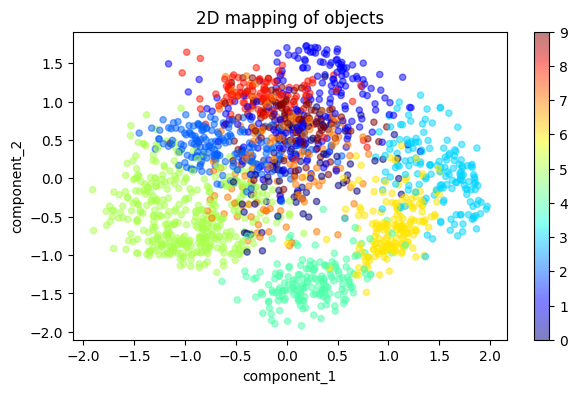

In [ ]:
display_components_in_2D_space(components_X_reduced, labels=labels_clast)

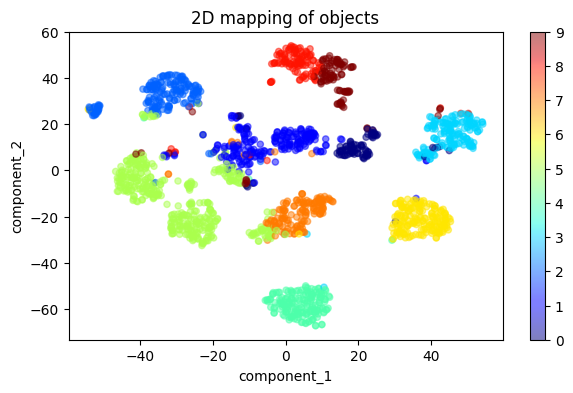

In [ ]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

**Визуализация центроид кластеров**

Возможно только для тех моделей понижения размерности, где реализован метод transform.

In [ ]:
kmeans.cluster_centers_

array([[ 0.00000000e+00,  4.85722573e-17,  2.15517241e-03,
         1.01293103e-01,  6.82471264e-01,  7.78735632e-01,
         2.43534483e-01,  5.36398467e-03, -1.30104261e-18,
         3.59195402e-03,  1.11350575e-01,  5.41666667e-01,
         8.71408046e-01,  7.92385057e-01,  2.93821839e-01,
         1.14942529e-02, -6.50521303e-19,  1.03448276e-01,
         5.45977011e-01,  7.93103448e-01,  7.70833333e-01,
         8.13936782e-01,  2.16954023e-01,  1.00574713e-02,
        -1.95156391e-18,  2.47509579e-01,  7.69396552e-01,
         7.37787356e-01,  8.11781609e-01,  8.42672414e-01,
         1.40229885e-01, -3.90312782e-18,  0.00000000e+00,
         1.33004926e-01,  4.31034483e-01,  4.61925287e-01,
         7.51436782e-01,  7.78735632e-01,  1.14121511e-01,
         0.00000000e+00, -3.90312782e-18,  5.24425287e-02,
         1.27873563e-01,  2.46408046e-01,  7.47844828e-01,
         7.42097701e-01,  7.54310345e-02,  8.67361738e-18,
         2.05998413e-18,  4.31034483e-03,  2.08333333e-0

[[ 0.15237852  0.18600269]
 [ 0.19967678  0.89458623]
 [-0.61549574  0.3949127 ]
 [ 1.47660025  0.07104046]
 [ 0.2459797  -1.33087205]
 [-0.96713799 -0.46374118]
 [ 1.02809316 -0.60747234]
 [-0.0776922   0.2890576 ]
 [-0.1968408   1.07583224]
 [ 0.03554387  0.69805821]]


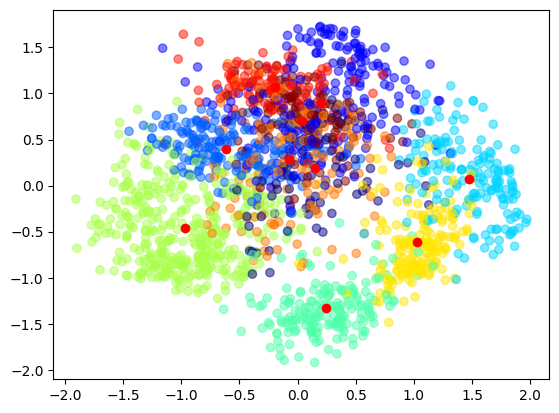

In [ ]:
centers_pca = pca.transform(kmeans.cluster_centers_)
print(centers_pca)

plt.scatter(components_X_reduced.iloc[:, 0], components_X_reduced.iloc[:, 1],
            c=labels_clast,
            alpha=0.5,
            cmap=plt.get_cmap('jet'))
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='r');

In [ ]:
tsne.transform(X)

AttributeError: 'TSNE' object has no attribute 'transform'

#### 🧠 Упражнение. Реализация метода локтя

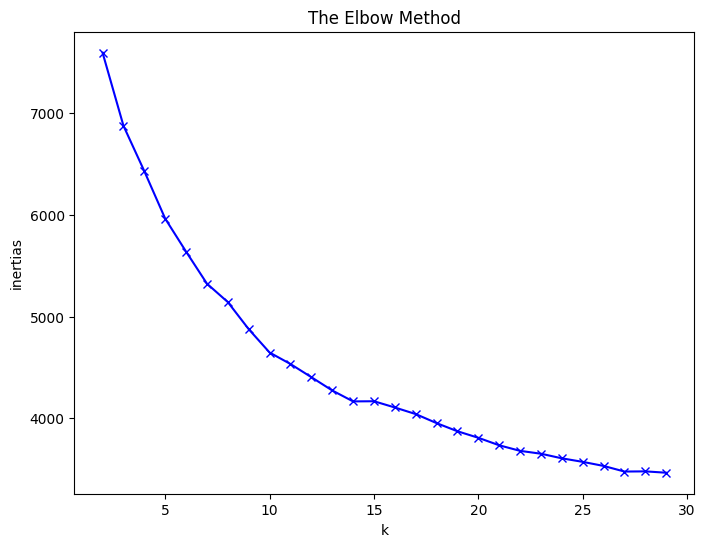

In [ ]:
def apply_elbow_method(X):
    inertias = []
    K = range(2, 30)
    ...

    plt.figure(figsize=(8, 6))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('inertias')
    plt.title('The Elbow Method')
    plt.show()


apply_elbow_method(X)

##### 🧠 Упражнение (ответ). Реализация метода локтя

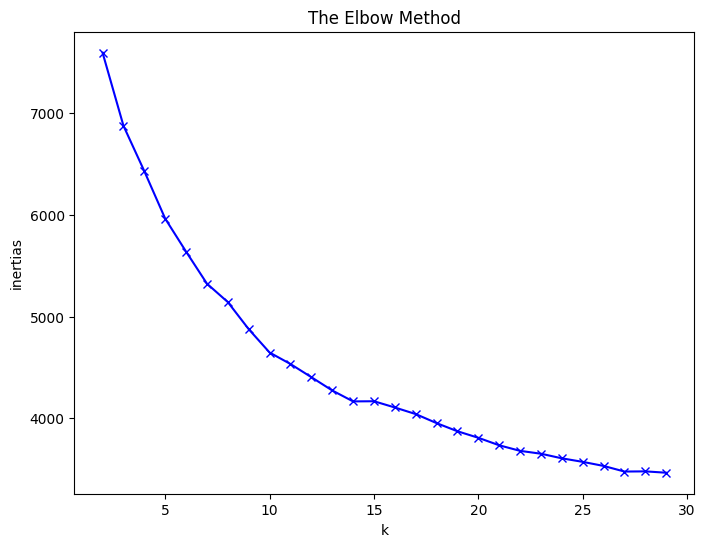

In [ ]:
def apply_elbow_method(X):
    inertias = []
    K = range(2, 30)
    for k in K:
        model = KMeans(n_clusters=k, random_state=1).fit(X)
        inertias.append(model.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('inertias')
    plt.title('The Elbow Method')
    plt.show()


apply_elbow_method(X)

### **DBSCAN**

In [ ]:
dbscan = DBSCAN(eps=1.5, min_samples=25)
labels_clast = dbscan.fit_predict(X)
labels_clast = pd.Series(labels_clast)

#### Предсказаний для новых объектов, если нет метода `.predict`

In [ ]:
dbscan.predict(X_test)

AttributeError: 'DBSCAN' object has no attribute 'predict'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier().fit(X, labels_clast)
knn.predict(X_test)

array([ 9,  3, -1,  5,  3,  8,  0, -1, -1, -1])

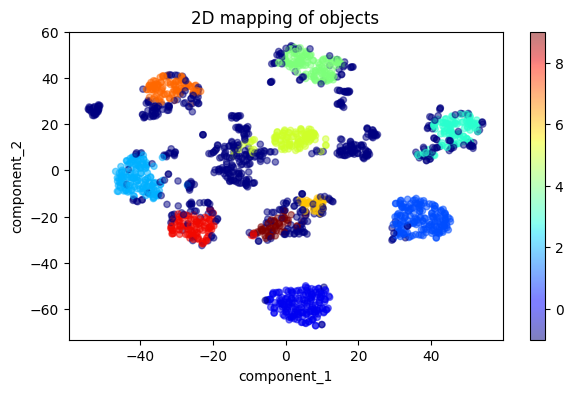

In [ ]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

### **AgglomerativeClustering**

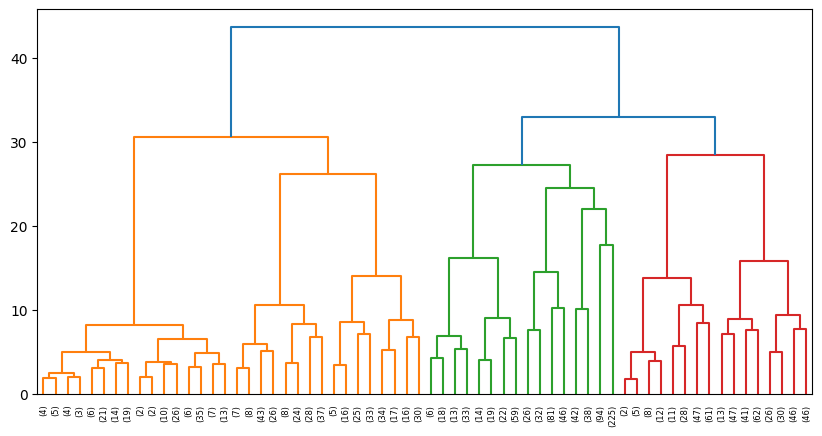

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X)

Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, truncate_mode='level', p=5)

In [ ]:
%%time
aggl = AgglomerativeClustering(n_clusters=9)
labels_clast = aggl.fit_predict(X)
labels_clast = pd.Series(labels_clast)

CPU times: user 244 ms, sys: 1.95 ms, total: 246 ms
Wall time: 285 ms


In [ ]:
aggl.predict(X_test)

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

In [ ]:
knn = KNeighborsClassifier().fit(X, labels_clast)
knn.predict(X_test)

array([2, 3, 0, 0, 3, 5, 7, 0, 5, 0])

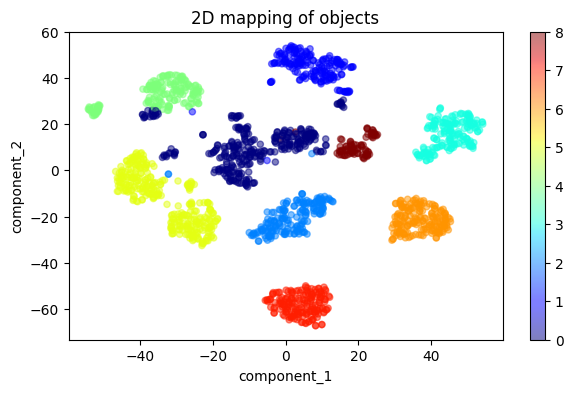

In [ ]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

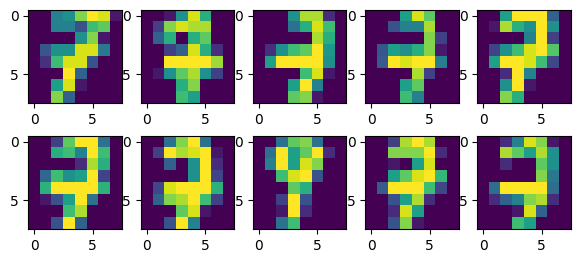

In [ ]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_clast == 1][i,:].reshape([8, 8]))

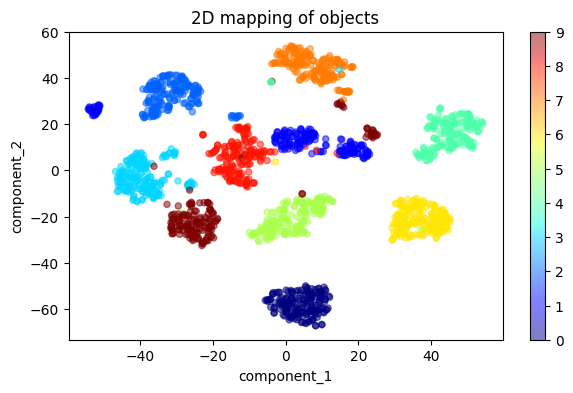

In [ ]:
display_components_in_2D_space(components_X_tsne, labels=y)

## Кластеризация геоданных

In [ ]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="cluster_geodata")

result = geolocator.geocode("Россия, Подольск, Пушкина 7")

result

Location(7, улица Пушкина, Климовск, Подольск, городской округ Подольск, Московская область, Центральный федеральный округ, 142100, Россия, (55.36461495, 37.53475382742339, 0.0))

In [ ]:
result.point

Point(55.36461495, 37.53475382742339, 0.0)

In [ ]:
result.latitude, result.longitude

(55.36461495, 37.53475382742339)

In [ ]:
result.raw

{'place_id': 394831946,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 723743647,
 'lat': '55.36461495',
 'lon': '37.53475382742339',
 'class': 'building',
 'type': 'yes',
 'place_rank': 30,
 'importance': 6.232471198591618e-05,
 'addresstype': 'building',
 'name': '',
 'display_name': '7, улица Пушкина, Климовск, Подольск, городской округ Подольск, Московская область, Центральный федеральный округ, 142100, Россия',
 'boundingbox': ['55.3645303', '55.3646995', '37.5346573', '37.5348504']}

In [ ]:
addresses = ['Россия, Самара, Западная 7',
             'Россия, Сургут, Островского, 8/1',
             'Россия, Ростов-на-Дону, Шоссейная 1',
             'Россия, Южно-Сахалинск, Садовый пер., 12',
             'Россия, Воронеж, Дорожная 9',
             'Россия, Ачинск, 2-й Овражный переулок, 12',
             'Россия, Северодвинск, Октябрьская 13',
             'Россия, Королёв, Чкалова, 19',
             'Россия, Сызрань, Шоссейная, 1',
             'ул. Пирогова, 34/1, Сочи',
             'Россия, Липецк, Социалистическая 11',
             'Россия, Волгоград, Мира 21',
             'Россия, Элиста, Советский пер. 4',
             'Россия, Рыбинск, Партизанская 20',
             'Россия, Якутск, Улица Крестьянская, 2/2',
             'Россия, Иваново, Демидова, 6']

In [ ]:
from sklearn.preprocessing import StandardScaler
from geopy.geocoders import Nominatim

# Геокодирование адресов
geolocator = Nominatim(user_agent="geoapiExercises")
coordinates = []

for address in addresses:
    location = geolocator.geocode(address)
    if location:
        coordinates.append((location.latitude, location.longitude))

coordinates

GeocoderInsufficientPrivileges: Non-successful status code 403

In [ ]:
geolocator = Nominatim(user_agent="cluster_geodata")

def geocode(query):
    result = geolocator.geocode(query)

    if result is None:
        return None
    return (result.latitude, result.longitude)

# Rate limit the requests to only 2 requests per second max.
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geocode, min_delay_seconds=1/2)

In [ ]:
geocode(addresses[0])

(53.1369399, 48.44156255)

In [ ]:
from tqdm import tqdm

coordinates = []

for address in tqdm(addresses):
    coord = geocode(address)
    if coord:
        coordinates.append(coord)
    else:
        print(address)

coordinates

100%|██████████| 16/16 [00:09<00:00,  1.77it/s]


[(53.1369399, 48.44156255),
 (61.25637295, 73.39869696020568),
 (47.2052059, 39.7163928),
 (46.9675571, 142.74458044676174),
 (51.6634272, 39.1529962),
 (56.2583761, 90.47071890331851),
 (64.59902045000001, 39.817916950000004),
 (55.9242343, 37.8651618),
 (53.08128655, 48.41750831690977),
 (43.6070817, 39.716937860274285),
 (52.52746945, 39.591216553437384),
 (49.7703174, 46.4551027),
 (46.278993549999996, 44.23979105),
 (58.0636436, 38.75547425295392),
 (62.1285725, 129.7476417),
 (57.0059847, 40.9730029)]

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

df = pd.DataFrame(coordinates, columns=['Latitude', 'Longitude'])

# Стандартизация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Кластеризация с использованием K-means
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(scaled_data)
df['address'] = addresses

df

,Latitude,Longitude,Cluster,address
0,53.136940,48.441563,0,"Россия, Самара, Западная 7"
1,61.256373,73.398697,0,"Россия, Сургут, Островского, 8/1"
2,47.205206,39.716393,1,"Россия, Ростов-на-Дону, Шоссейная 1"
3,46.967557,142.744580,2,"Россия, Южно-Сахалинск, Садовый пер., 12"
4,51.663427,39.152996,1,"Россия, Воронеж, Дорожная 9"
5,56.258376,90.470719,2,"Россия, Ачинск, 2-й Овражный переулок, 12"
6,64.599020,39.817917,0,"Россия, Северодвинск, Октябрьская 13"
7,55.924234,37.865162,0,"Россия, Королёв, Чкалова, 19"
8,53.081287,48.417508,0,"Россия, Сызрань, Шоссейная, 1"
9,43.607082,39.716938,1,"ул. Пирогова, 34/1, Сочи"


In [ ]:
components_X = df[['Latitude', 'Longitude']]
components_X.columns = ['component_1', 'component_2']
components_X

,component_1,component_2
0,53.136940,48.441563
1,61.256373,73.398697
2,47.205206,39.716393
3,46.967557,142.744580
4,51.663427,39.152996
5,56.258376,90.470719
6,64.599020,39.817917
7,55.924234,37.865162
8,53.081287,48.417508
9,43.607082,39.716938


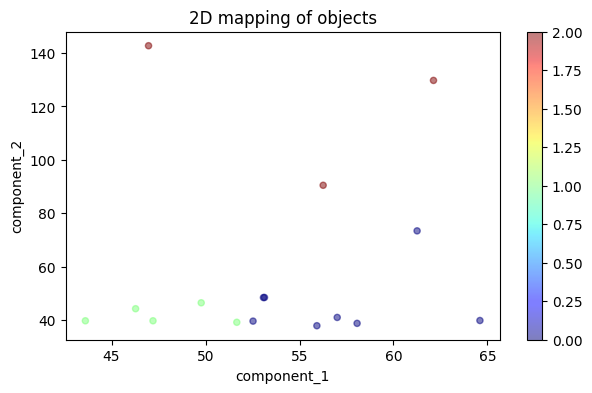

In [ ]:
display_components_in_2D_space(components_X, labels=df['Cluster'])

In [ ]:
!pip install folium

In [ ]:
import folium
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    color = colors[point['Cluster']]
    folium.CircleMarker(
        location=[point.Latitude, point.Longitude],
        radius=2,
        weight=5,
        color=color,
        popup=point.Cluster
    ).add_to(this_map)

colors = ['#DB7C26', '#34113F', '#A3BCF9']
df.apply(plotDot, axis=1)

this_map.fit_bounds(this_map.get_bounds())

this_map

## Кластеризация картинки

Для этого загрузим картинку и будем каждый ее пиксель рассматривать как отдельный объект с тремя признаками R G B, отвечающими за цвет пикселя. Нам понадобится изменить форму тензора с изображением, вытянув все пиксели вдоль одной оси, чтобы получить матрицу объекты-признаки.

In [ ]:
!wget 'https://raw.githubusercontent.com/iad34/seminars/master/materials/apple.png' -O apple.png

--2024-10-02 09:30:11--  https://raw.githubusercontent.com/iad34/seminars/master/materials/apple.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119182 (116K) [image/png]
Saving to: ‘apple.png’

apple.png           100%[===================>] 116.39K  --.-KB/s    in 0.02s   

2024-10-02 09:30:11 (4.59 MB/s) - ‘apple.png’ saved [119182/119182]



In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('apple.png')
img.shape

(237, 316, 3)

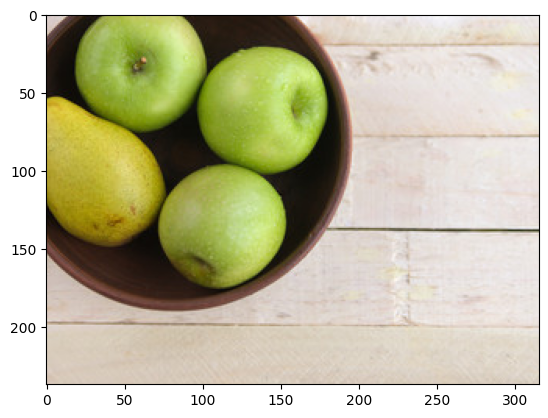

In [ ]:
plt.imshow(img);

In [ ]:
img.reshape(-1, 3).shape

(74892, 3)

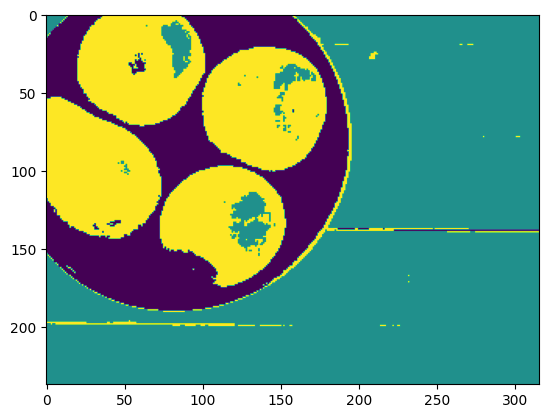

In [ ]:
from sklearn.cluster import KMeans

X = img.reshape(-1, 3)
cls = KMeans(3)
cls.fit(X)

y = cls.predict(X)
plt.imshow(y.reshape(img.shape[:2]))

In [ ]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
y.shape

(74892,)

In [ ]:
X.shape

(74892, 3)

In [ ]:
y.shape

(74892,)

Обратите внимание, что при кластеризации никак не учитывалась информация о положении пикселя на изображении, а учитывался только цвет.

In [ ]:
y[:]

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
centroids[y]

array([[0.5605153 , 0.61459756, 0.22853628],
       [0.5605153 , 0.61459756, 0.22853628],
       [0.5605153 , 0.61459756, 0.22853628],
       ...,
       [0.5605153 , 0.61459756, 0.22853628],
       [0.5605153 , 0.61459756, 0.22853628],
       [0.5605153 , 0.61459756, 0.22853628]], dtype=float32)

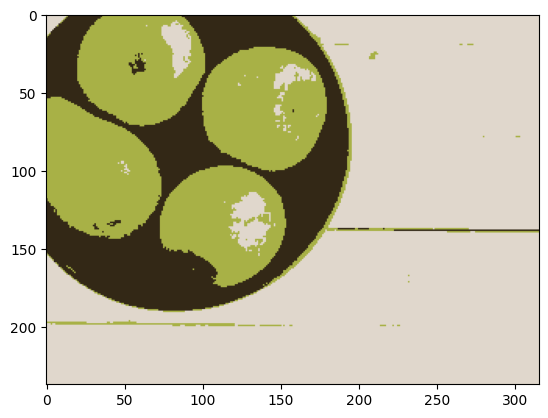

In [ ]:
centroids = cls.cluster_centers_

compressed_img = centroids[y].reshape(img.shape)#.astype(np.uint8)
plt.imshow(compressed_img);

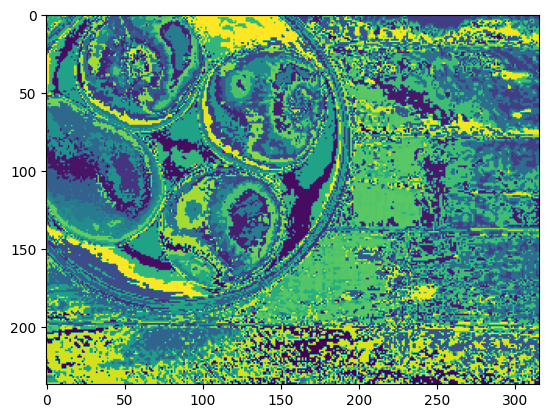

In [ ]:
from sklearn.cluster import KMeans

X = img.reshape(-1, 3)
cls = KMeans(60)
cls.fit(X)
y = cls.predict(X)
plt.imshow(y.reshape(img.shape[:2]));

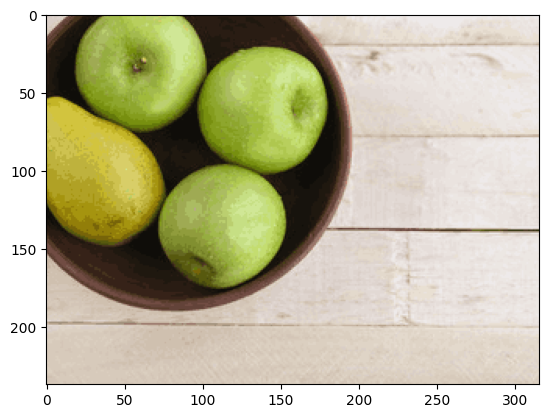

In [ ]:
centroids = cls.cluster_centers_

compressed_img = centroids[y].reshape(img.shape)#.astype(np.uint8)
plt.imshow(compressed_img);

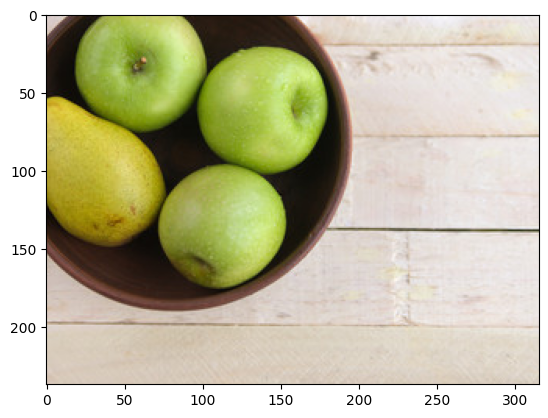

In [ ]:
plt.imshow(img);

Пример датасета, где может потребоваться кластеризация картинки https://www.kaggle.com/datasets/trainingdatapro/roads-segmentation-dataset

## Кластеризация клиентов

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


Здесь предобработанный датасет, будем работать с ним:
https://drive.google.com/file/d/114rxJxQgamML4LRIxVGfBxygb_CRdNX1

In [ ]:
!wget 'https://drive.google.com/uc?id=114rxJxQgamML4LRIxVGfBxygb_CRdNX1' -O marketing_campaign.csv

--2024-10-02 09:30:23--  https://drive.google.com/uc?id=114rxJxQgamML4LRIxVGfBxygb_CRdNX1
Resolving drive.google.com (drive.google.com)... 172.217.204.138, 172.217.204.101, 172.217.204.100, ...
Connecting to drive.google.com (drive.google.com)|172.217.204.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=114rxJxQgamML4LRIxVGfBxygb_CRdNX1 [following]
--2024-10-02 09:30:23--  https://drive.usercontent.google.com/download?id=114rxJxQgamML4LRIxVGfBxygb_CRdNX1
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.210.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 201951 (197K) [application/octet-stream]
Saving to: ‘marketing_campaign.csv’

marketing_campaign. 100%[===================>] 197.22K  --.-KB/s    in 0.002s  

2024-10-02 09:30:2

**Описание датасета:**

People

    ID: Customer's unique identifier
    Year_Birth: Customer's birth year
    Education: Customer's education level
    Marital_Status: Customer's marital status
    Income: Customer's yearly household income
    Kidhome: Number of children in customer's household
    Teenhome: Number of teenagers in customer's household
    Dt_Customer: Date of customer's enrollment with the company
    Recency: Number of days since customer's last purchase
    Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

    MntWines: Amount spent on wine in last 2 years
    MntFruits: Amount spent on fruits in last 2 years
    MntMeatProducts: Amount spent on meat in last 2 years
    MntFishProducts: Amount spent on fish in last 2 years
    MntSweetProducts: Amount spent on sweets in last 2 years
    MntGoldProds: Amount spent on gold in last 2 years

Promotion

    NumDealsPurchases: Number of purchases made with a discount
    AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

    NumWebPurchases: Number of purchases made through the company’s website
    NumCatalogPurchases: Number of purchases made using a catalogue
    NumStorePurchases: Number of purchases made directly in stores
    NumWebVisitsMonth: Number of visits to company’s website in the last month


In [ ]:
import pandas as pd

df = pd.read_csv('marketing_campaign.csv')
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Age,TotalMnt,In_Relationship,Children,Family_Size,Is_Parent,NumPurchases,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,58138.0,58,635,88,546,172,88,88,3,8,...,57,1617,0,0,1,0,22,True,False,False
1,46344.0,38,11,1,6,2,1,6,2,1,...,60,27,0,2,3,1,4,True,False,False
2,71613.0,26,426,49,127,111,21,42,1,8,...,49,776,1,0,2,0,20,True,False,False
3,26646.0,26,11,4,20,10,3,5,2,2,...,30,53,1,1,3,1,6,True,False,False
4,58293.0,94,173,43,118,46,27,15,5,5,...,33,422,1,1,3,1,14,False,True,False


In [ ]:
df.shape

(2212, 31)

### Предобработка

In [ ]:
df.isna().sum()

,0
Income,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0
NumDealsPurchases,0
NumWebPurchases,0


### Масштабирование

In [ ]:
target_col = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

targets = df[target_col]

df.drop(columns=target_col, inplace=True)

df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Age,TotalMnt,In_Relationship,Children,Family_Size,Is_Parent,NumPurchases,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,58138.0,58,635,88,546,172,88,88,3,8,...,57,1617,0,0,1,0,22,True,False,False
1,46344.0,38,11,1,6,2,1,6,2,1,...,60,27,0,2,3,1,4,True,False,False
2,71613.0,26,426,49,127,111,21,42,1,8,...,49,776,1,0,2,0,20,True,False,False
3,26646.0,26,11,4,20,10,3,5,2,2,...,30,53,1,1,3,1,6,True,False,False
4,58293.0,94,173,43,118,46,27,15,5,5,...,33,422,1,1,3,1,14,False,True,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

colnames = df.columns
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=colnames)

df_scaled.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Age,TotalMnt,In_Relationship,Children,Family_Size,Is_Parent,NumPurchases,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.200000,0.296296,...,0.696429,0.639683,0.0,0.000000,0.00,0.0,0.6875,1.0,0.0,0.0
1,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.133333,0.037037,...,0.750000,0.008730,0.0,0.666667,0.50,1.0,0.1250,1.0,0.0,0.0
2,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.066667,0.296296,...,0.553571,0.305952,1.0,0.000000,0.25,0.0,0.6250,1.0,0.0,0.0
3,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.133333,0.074074,...,0.214286,0.019048,1.0,0.333333,0.50,1.0,0.1875,1.0,0.0,0.0
4,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.333333,0.185185,...,0.267857,0.165476,1.0,0.333333,0.50,1.0,0.4375,0.0,1.0,0.0


In [ ]:
df_scaled.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Age,TotalMnt,In_Relationship,Children,Family_Size,Is_Parent,NumPurchases,Education_Graduate,Education_Postgraduate,Education_Undergraduate
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,...,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,0.312627,0.495146,0.204479,0.132309,0.096829,0.145362,0.103231,0.136841,0.154973,0.151413,...,0.483685,0.238995,0.645570,0.315853,0.398282,0.714286,0.392716,0.504069,0.382007,0.113924
std,0.133987,0.292355,0.225936,0.199719,0.130003,0.211475,0.156836,0.161081,0.128300,0.101562,...,0.208957,0.239093,0.478449,0.249822,0.226559,0.451856,0.225170,0.500096,0.485988,0.317791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.208528,0.242424,0.016075,0.010050,0.009275,0.011583,0.003817,0.028037,0.066667,0.074074,...,0.339286,0.025397,0.000000,0.000000,0.250000,0.000000,0.187500,0.000000,0.000000,0.000000
50%,0.308968,0.494949,0.117549,0.040201,0.039420,0.046332,0.030534,0.076324,0.133333,0.148148,...,0.464286,0.155556,1.000000,0.333333,0.500000,1.000000,0.375000,1.000000,0.000000,0.000000
75%,0.415499,0.747475,0.338245,0.165829,0.134638,0.193050,0.125954,0.174455,0.200000,0.222222,...,0.660714,0.413889,1.000000,0.333333,0.500000,1.000000,0.570312,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Понижение размерности

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


def reduce_dims(df, dims=2, method='pca', perplexity=30):

    assert method in ['pca', 'tsne'], 'Неверно указан метод'

    if method == 'pca':
        dim_reducer = PCA(n_components=dims, random_state=1)
        components = dim_reducer.fit_transform(df)
    elif method == 'tsne':
        dim_reducer = TSNE(n_components=dims, random_state=1, perplexity=perplexity)
        components = dim_reducer.fit_transform(df)
    else:
        print('Error')

    colnames = ['component_' + str(i) for i in range(1, dims+1)]
    return dim_reducer, pd.DataFrame(data = components, columns = colnames)

In [ ]:
dim_reducer2d, components_2d = reduce_dims(df_scaled, dims=2, method='pca')
components_2d.head(2)

,component_1,component_2
0,1.078732,-0.893815
1,0.342218,0.766790


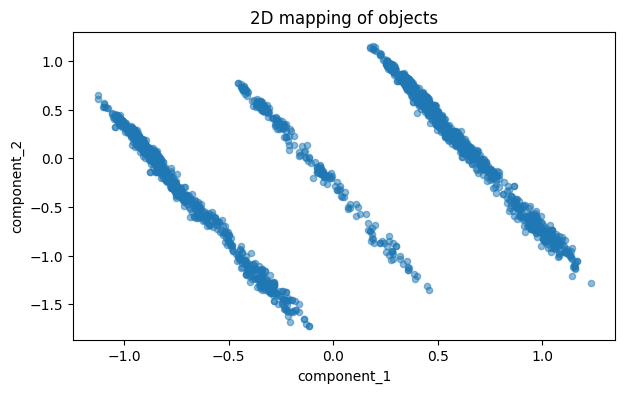

In [ ]:
display_components_in_2D_space(components_2d)

In [ ]:
dim_reducer2d.explained_variance_ratio_

array([0.25191062, 0.23626491])

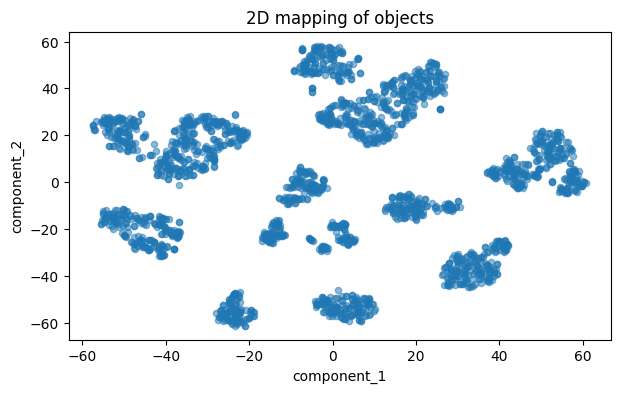

CPU times: user 18.5 s, sys: 193 ms, total: 18.7 s
Wall time: 20.9 s


In [ ]:
%%time
dim_reducer2d_tsne, components_2d_tsne = reduce_dims(df_scaled, dims=2, method='tsne', perplexity=25)
display_components_in_2D_space(components_2d_tsne)

### 🧠 Упражнение. Обучение моделей кластеризации

1. Обучите модель KMeans на 3 кластера и визуализируйте кластеры на данных в 2D
2. Обучите модель DBSCAN, чтобы плюс-минус получилось 3 кластера и визуализируйте кластеры на данных в 2D
3. Обучите модель Агломеративной кластеризации на 3 кластера и визуализируйте кластеры на данных в 2D
4. Выберите самую лучшую модель по визуальной оценке и метрике качества силует

#### 🧠 Упражнение (ответ). Обучение моделей кластеризации

1. Обучите модель KMeans на 3 кластера и визуализируйте кластеры на данных в 2D

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
labels_clast_km = kmeans.fit_predict(df_scaled)
labels_clast_km

array([0, 2, 0, ..., 0, 1, 1], dtype=int32)

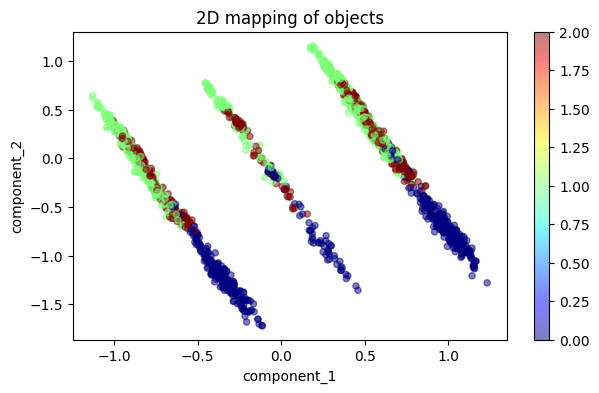

In [ ]:
display_components_in_2D_space(components_2d, labels_clast_km)

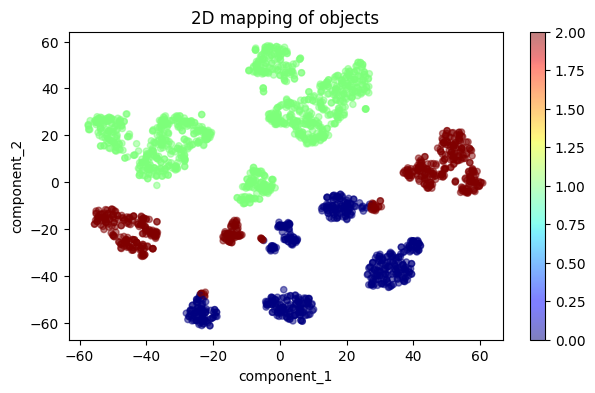

In [ ]:
display_components_in_2D_space(components_2d_tsne, labels_clast_km)

2. Обучите модель DBSCAN, чтобы плюс-минус получилось 3 кластера и визуализируйте кластеры на данных в 2D

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=5)
labels_clast_db = dbscan.fit_predict(df_scaled)
pd.Series(labels_clast_db).nunique()

4

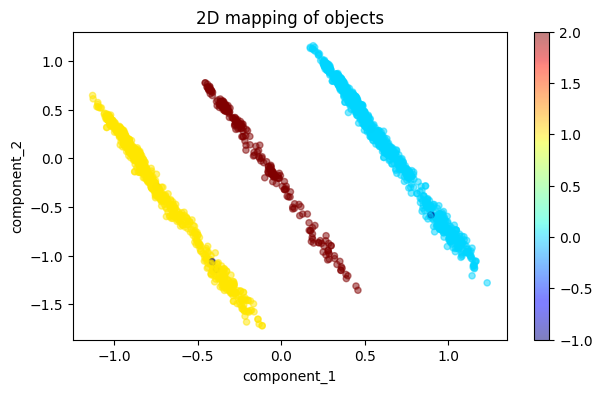

In [ ]:
display_components_in_2D_space(components_2d, labels_clast_db)

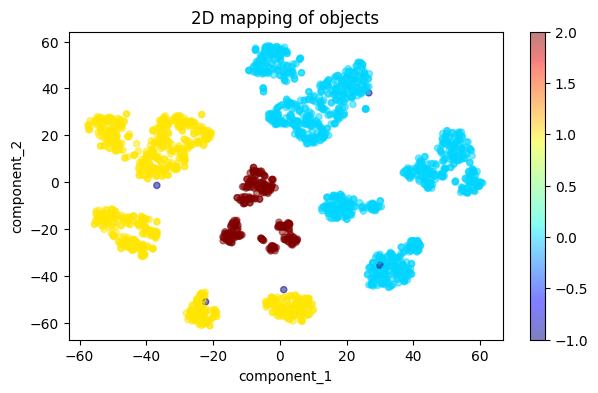

In [ ]:
display_components_in_2D_space(components_2d_tsne, labels_clast_db)

3. Обучите модель Агломеративной кластеризации на 3 кластера и визуализируйте кластеры на данных в 2D

In [ ]:
%%time
from sklearn.cluster import AgglomerativeClustering
aggl = AgglomerativeClustering(n_clusters=3)
labels_clast_ag = aggl.fit_predict(df_scaled)

CPU times: user 304 ms, sys: 28.8 ms, total: 333 ms
Wall time: 343 ms


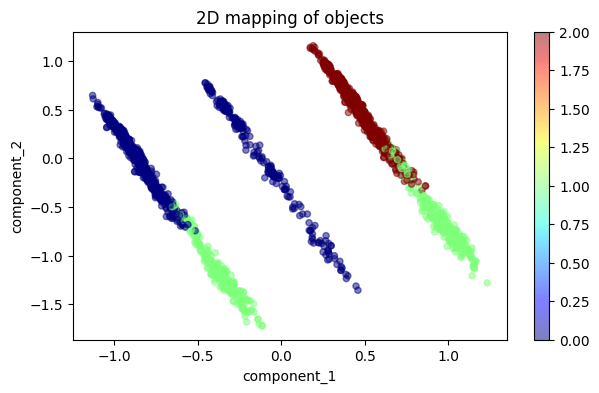

In [ ]:
display_components_in_2D_space(components_2d, labels_clast_ag)

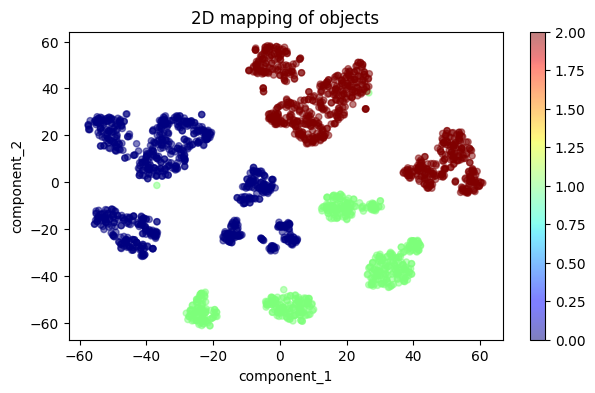

In [ ]:
display_components_in_2D_space(components_2d_tsne, labels_clast_ag)

4. Выберите самую лучшую модель по визуальной оценке и метрике качества силует

In [ ]:
from sklearn.metrics.cluster import silhouette_score

print('KMeans', silhouette_score(df_scaled, labels_clast_km))
print('Aggl', silhouette_score(df_scaled, labels_clast_ag))
print('DBSCAN', silhouette_score(df_scaled, labels_clast_db))

KMeans 0.18567293676419325
Aggl 0.23399692630962105
DBSCAN 0.29132267052116334


### Анализ кластеров

In [ ]:
df['Cluster'] = labels_clast_ag
# df['Cluster'] = labels_clast_db
# df = df[~(df['Cluster'] == -1)]

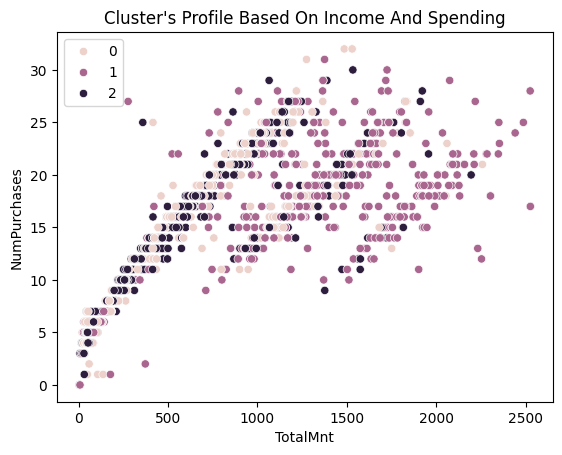

In [ ]:
import seaborn as sns

sns.scatterplot(data=df, x=df["TotalMnt"], y=df["NumPurchases"], hue=df["Cluster"])
plt.title("Cluster's Profile Based On Income And Spending")
plt.legend();

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


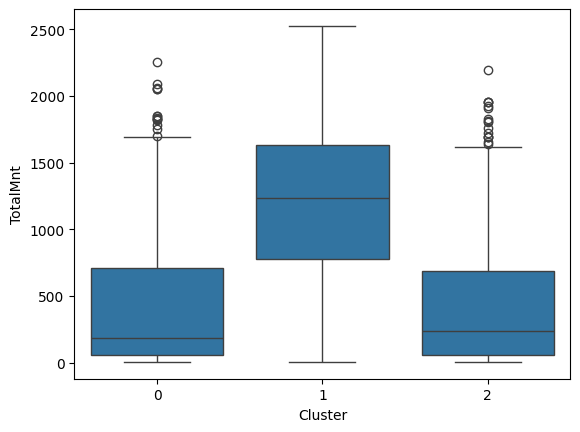

In [ ]:
sns.boxplot(x=df["Cluster"], y=df["TotalMnt"]);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


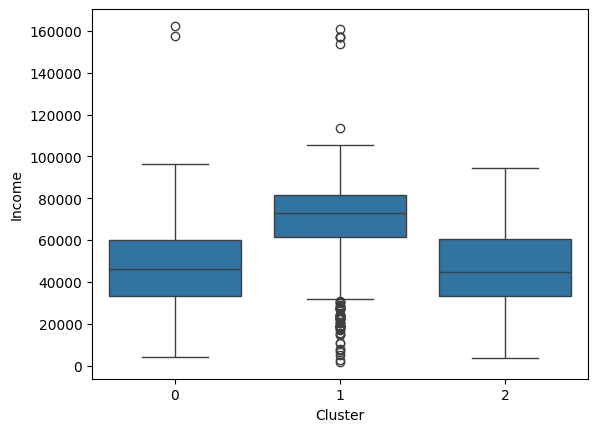

In [ ]:
sns.boxplot(x=df["Cluster"], y=df["Income"]);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


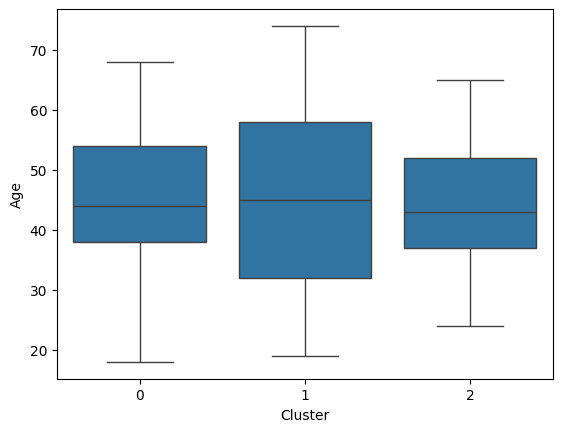

In [ ]:
sns.boxplot(x=df["Cluster"], y=df["Age"]);

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


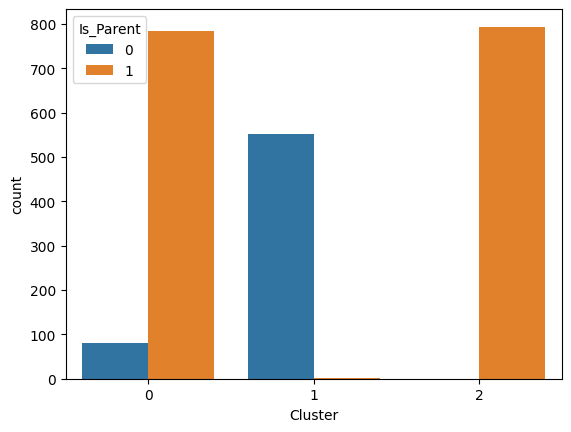

In [ ]:
sns.countplot(x=df["Cluster"], hue=df['Is_Parent']);

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


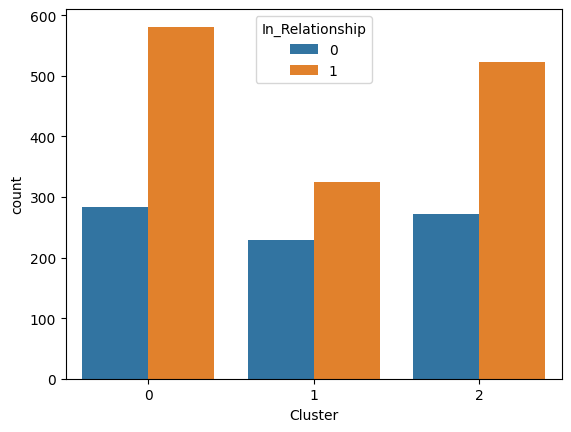

In [ ]:
sns.countplot(x=df["Cluster"], hue=df['In_Relationship']);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


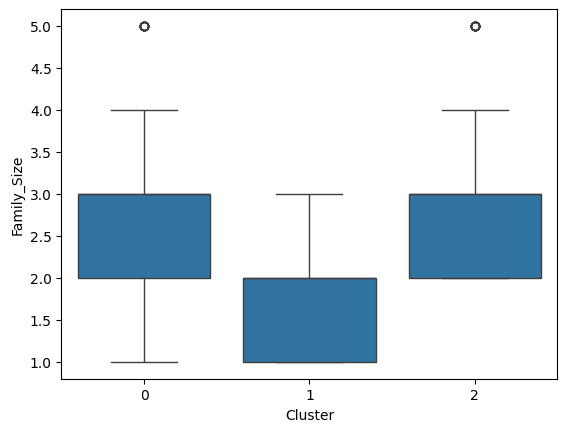

In [ ]:
sns.boxplot(x=df["Cluster"], y=df['Family_Size']);

<ipython-input-170-f899548c8d1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets["Total_Promos"] = targets["AcceptedCmp1"] + targets["AcceptedCmp2"] + \
<ipython-input-170-f899548c8d1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets['Accepted'] = (targets['Total_Promos'] > 0).astype('int')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. P

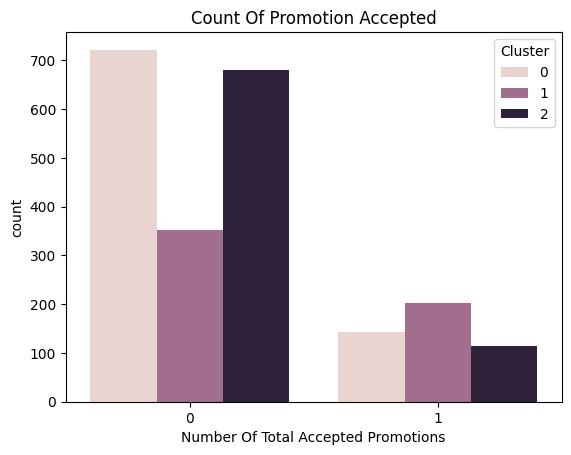

In [ ]:
targets["Total_Promos"] = targets["AcceptedCmp1"] + targets["AcceptedCmp2"] + \
                          targets["AcceptedCmp3"] + targets["AcceptedCmp4"]+ targets["AcceptedCmp5"]
targets['Accepted'] = (targets['Total_Promos'] > 0).astype('int')

sns.countplot(x=targets["Accepted"], hue=df["Cluster"])
plt.title("Count Of Promotion Accepted")
plt.xlabel("Number Of Total Accepted Promotions")
plt.show()

In [ ]:
pd.crosstab(index=targets['Accepted'],
            columns=df['Cluster'],
            normalize='index')

Cluster,0,1,2
Accepted,,,
0,0.411631,0.200684,0.387685
1,0.310044,0.441048,0.248908


## Дополнительные материалы
1. Метрики sklearn для задач кластеризации http://scikit-learn.org/stable/modules/classes.html
2. Open Data Science, habrahabr: Обучение без  учителя: PCA и кластеризация https://habrahabr.ru/company/ods/blog/325654/
3. Модель KMeans https://youtu.be/EHZJMz6zyFE
4. Метод локтя https://youtu.be/BEhLlqkL-f4
